In [63]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [64]:
fmnist = tf.keras.datasets.fashion_mnist
(x_train , y_train ),( x_test , y_test )= fmnist.load_data()
x_test , x_train = x_test / 255.0 , x_train / 255.0

In [65]:
from keras import backend as k
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)

else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [66]:
x_train[0].shape

(28, 28, 1)

In [67]:
model = tf.keras.models.Sequential([

    # flatten layer has been deleted
    # weigth = mask  / kenel / filter  --- >  LAYE HAYE CONVOLUTION HASTAN INJA
    # shabake rooye ina train va update mishe
    # mask ha dar tasvire rangi barabarand ba 3*3*3

    # deep learning
    tf.keras.layers.Conv2D(filters= 128 , kernel_size = (3,3) , activation="relu" ,input_shape=(28,28 ,1) ) ,
    tf.keras.layers.Conv2D(filters= 128 , kernel_size = (3,3) , activation="relu") ,
    tf.keras.layers.MaxPooling2D() ,
    tf.keras.layers.Dropout(0.4) ,

    tf.keras.layers.Conv2D(filters= 256 , kernel_size = (3,3) , activation="relu") ,
    tf.keras.layers.Conv2D(filters= 256 , kernel_size = (3,3) , activation="relu") ,
    tf.keras.layers.MaxPooling2D() ,
    tf.keras.layers.Dropout(0.4) ,

    # tf.keras.layers.Conv2D(filters= 512 , kernel_size = (3,3) , activation="relu") ,
    # tf.keras.layers.Conv2D(filters= 512 , kernel_size = (3,3) , activation="relu") ,
    # tf.keras.layers.MaxPooling2D() ,

    # data haye ma arraye 2 bodi hastan
    # ama MLP 1 bodi mikhad --- > pas majboorim flatten bezanim
    tf.keras.layers.Flatten() ,

    # machine learning / fully connected
    tf.keras.layers.Dense(250 , activation="sigmoid") ,
    #tf.keras.layers.Dense(128 , activation="sigmoid") ,
    # tf.keras.layers.Dense(512 , activation="relu") ,
    tf.keras.layers.Dropout(0.6) ,
    tf.keras.layers.Dense(10 , activation="softmax")
])



In [68]:
model.compile(optimizer= "adamax" , loss= tf.keras.losses.sparse_categorical_crossentropy , metrics=["accuracy"])

out = model.fit(x_train , y_train , epochs= 35)
model.evaluate(x_test , y_test)

Epoch 1/35
1875/1875 [==============================] - 19s 9ms/step - loss: 2.3087 - accuracy: 0.1008
Epoch 2/35
1875/1875 [==============================] - 17s 9ms/step - loss: 0.9602 - accuracy: 0.6477
Epoch 3/35
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6476 - accuracy: 0.7586
Epoch 4/35
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5633 - accuracy: 0.7909
Epoch 5/35
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5135 - accuracy: 0.8094
Epoch 6/35
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4783 - accuracy: 0.8237
Epoch 7/35
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4551 - accuracy: 0.8328
Epoch 8/35
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4338 - accuracy: 0.8393
Epoch 9/35
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4161 - accuracy: 0.8479
Epoch 10/35
1875/1875 [==============================] - 17s 9ms/step - l

[0.25767308473587036, 0.906000018119812]

In [69]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 conv2d_37 (Conv2D)          (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 12, 12, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_27 (Dropout)        (None, 12, 12, 128)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 10, 10, 256)       295168    
                                                                 
 conv2d_39 (Conv2D)          (None, 8, 8, 256)         590080    
                                                      

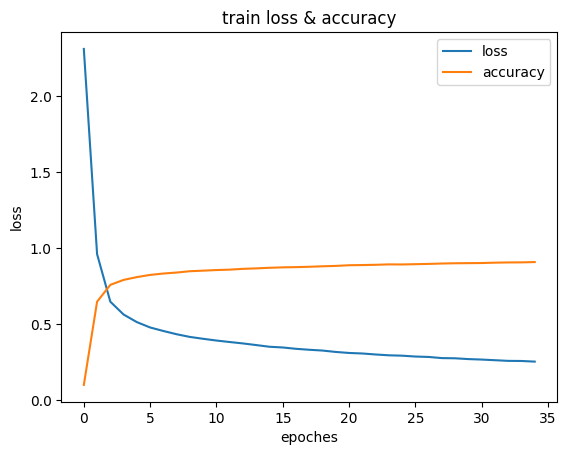

In [70]:
plt.plot(out.history["loss"] )
plt.plot( out.history["accuracy"])
plt.xlabel("epoches")
plt.ylabel("loss")
plt.title("train loss & accuracy")
plt.legend(["loss" , "accuracy"])
plt.show()